Imports

In [1]:
import backtrader as bt
from datetime import datetime
import yfinance as yf
import pickle
import matplotlib

from strategies import Keltner, LogReg

Cerebro Instance

In [2]:
cerebro = bt.Cerebro()

Market Data

In [3]:
"GC=F" # Gold
"^GSPC" # S&P500

data = yf.download("^GSPC", interval="1m") #must match name of agent

feed = bt.feeds.PandasDirectData(dataname = data)

cerebro.adddata(feed)

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-19 13:53:00-05:00,3909.429932,3910.550049,3909.209961,3910.360107,3910.360107,0
2023-01-19 13:54:00-05:00,3910.320068,3910.439941,3908.879883,3909.040039,3909.040039,2868000
2023-01-19 13:55:00-05:00,3908.790039,3908.790039,3907.870117,3908.600098,3908.600098,3417000
2023-01-19 13:56:00-05:00,3908.649902,3909.229980,3907.689941,3908.159912,3908.159912,3359000
2023-01-19 13:57:00-05:00,3908.280029,3909.399902,3908.280029,3908.929932,3908.929932,2792000


Portfolio Balance

In [4]:
init_balance = 4113

cerebro.broker.setcash(init_balance)

Loading Strategy

In [5]:
cerebro.addstrategy(LogReg)

sizer = bt.sizers.PercentSizer

cerebro.addsizer(sizer)

Running Strategy

In [6]:
cerebro.run()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Results

Final Portfolio Value: £4646.603240036736
P/L: £533.6032400367358


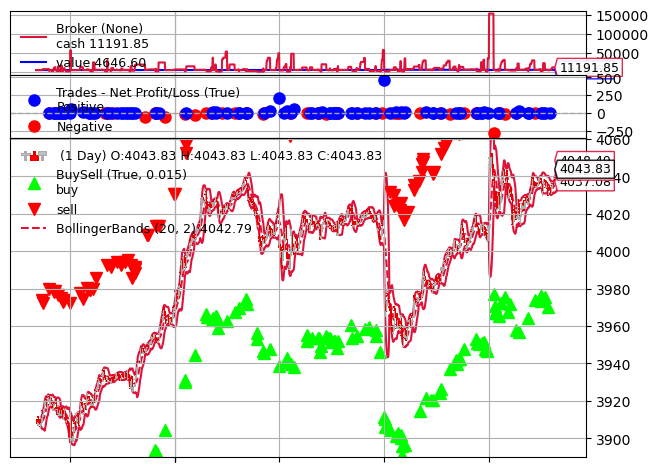

[[<Figure size 640x480 with 3 Axes>]]

In [8]:
portvalue = cerebro.broker.getvalue()
pnl = portvalue - init_balance

print(f'Final Portfolio Value: £{portvalue}')
print(f'P/L: £{pnl}')

%matplotlib inline

cerebro.plot(iplot=False, style="candlestick", volume = False, filename='plot.png' )
